In [0]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt
import plotly
from skimage import io
from skimage import morphology as morp
import plotly.express as px
import plotly.graph_objects as go

In [0]:
path = '/content/drive/My Drive/IP/'

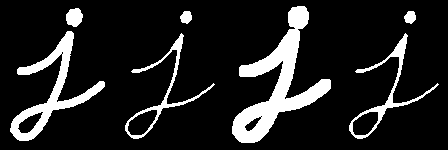

In [0]:
I = cv2.imread('/content/drive/My Drive/Image Processing/j.png', cv2.IMREAD_GRAYSCALE)
kernel = np.ones((5,5),np.uint8)
erosion1 = cv2.erode(I,kernel,iterations = 1)
dilation = cv2.dilate(I,kernel,iterations = 1)
erosion2 = cv2.erode(dilation,kernel,iterations = 2)
cv2_imshow(np.hstack([I,erosion1,dilation,erosion2]))

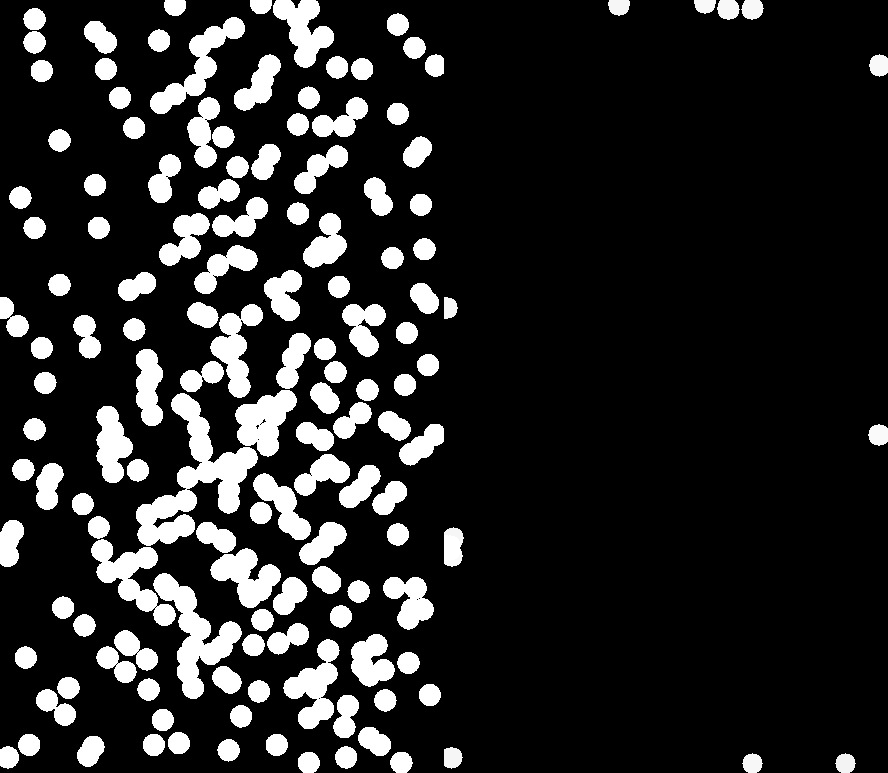

In [0]:
I = cv2.imread(path + 'coins.jpg', cv2.IMREAD_GRAYSCALE)
kernel = morp.disk(10)
erosion1 = cv2.erode(I,kernel,iterations = 1)
erosion1[10:erosion1.shape[0]-10,10:erosion1.shape[1]-10] = 0
erosion1 = cv2.dilate(erosion1,kernel,iterations = 1)
cv2_imshow(np.hstack([I,erosion1]))

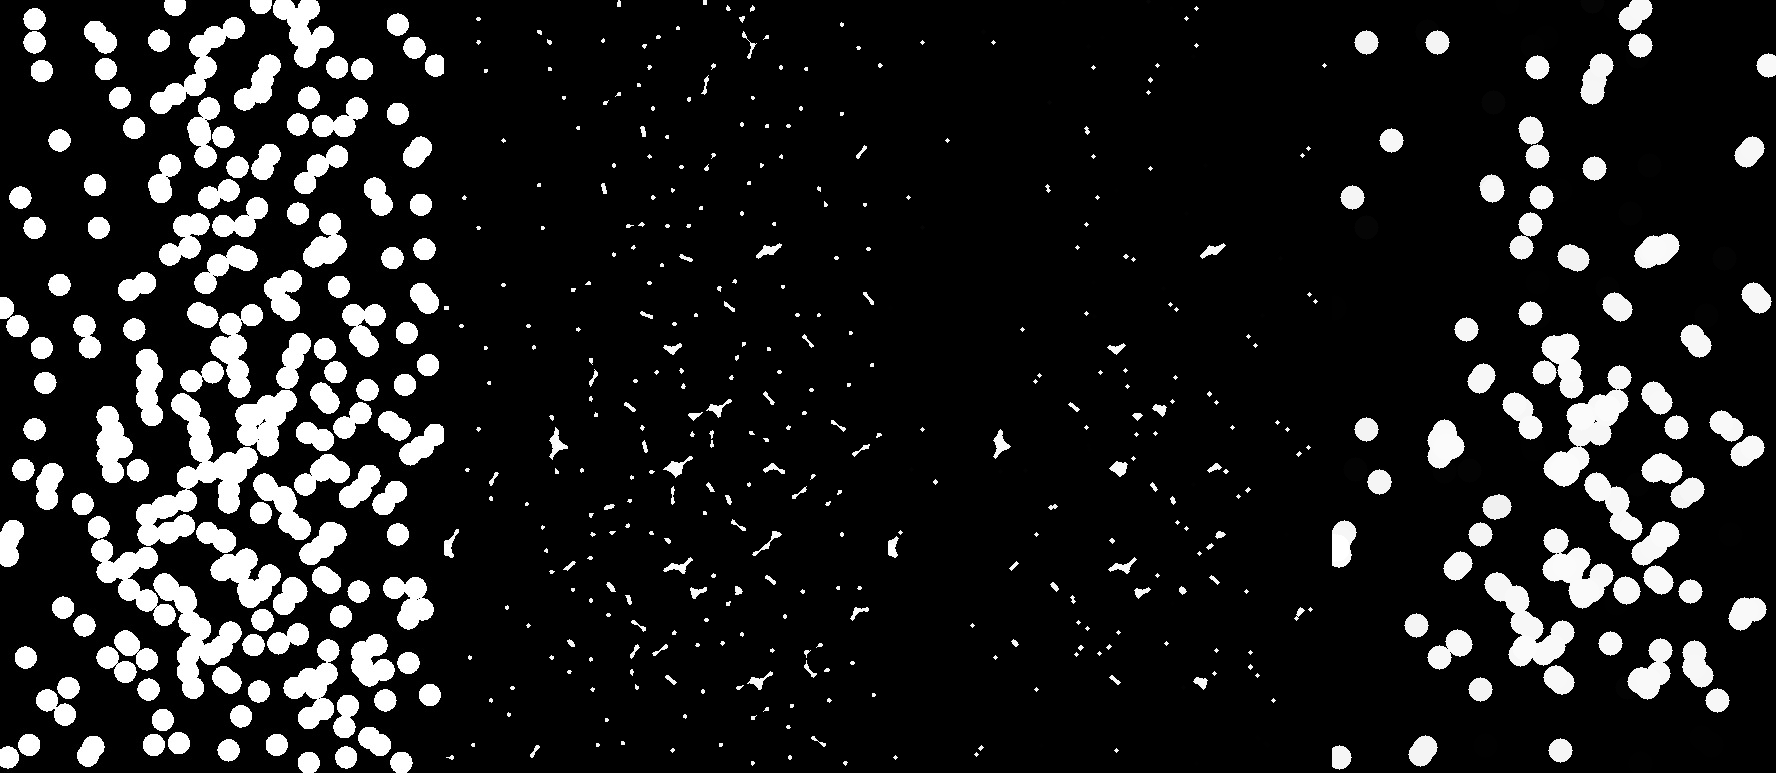

In [0]:
I = cv2.imread(path + 'coins.jpg', cv2.IMREAD_GRAYSCALE)
kernel = morp.disk(9)
erosion1 = cv2.erode(I,kernel,iterations = 1)
kernel = morp.disk(2)
opening = cv2.morphologyEx(erosion1, cv2.MORPH_OPEN, kernel)
kernel = morp.disk(5)
opening = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel)
kernel = morp.disk(2)
opening = cv2.morphologyEx(opening, cv2.MORPH_OPEN, kernel)

kernel = morp.disk(10)
cls = cv2.dilate(opening,kernel,iterations = 1)
cv2_imshow(np.hstack([I,erosion1, opening,cls]))

In [0]:
I = cv2.imread(path + 'text2.png')
# Threshold it so it becomes binary
ret, thresh = cv2.threshold(I,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
output = cv2.connectedComponentsWithStats(thresh, 4, cv2.CV_32S)
output

(1, None, array([[2147483647, 2147483647,          2,          2,          0]],
       dtype=int32), array([[nan, nan]]))

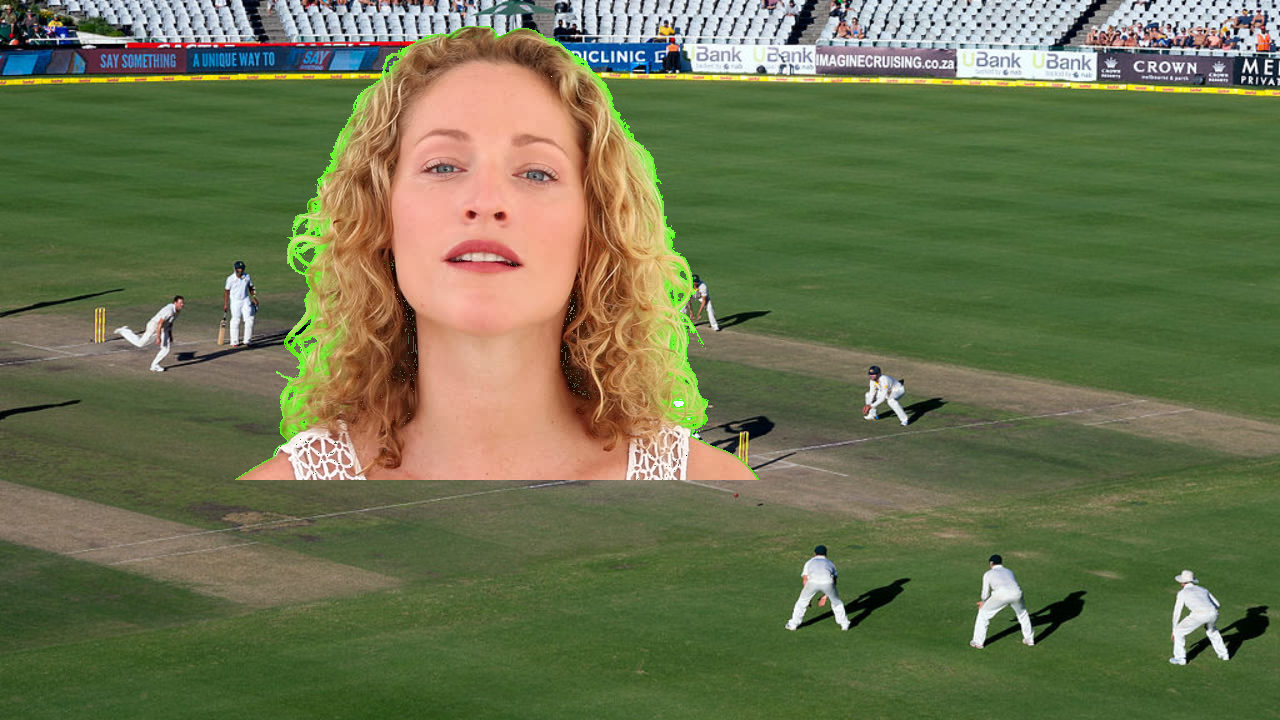

In [0]:
F = cv2.imread(path + 'chroma_img.jpg')
B = cv2.imread(path + 'stadium.jpg')
B.shape 
F.shape
xo = 0
yo = 0 
for i in range(F.shape[0]):
  for j in range(F.shape[1]):
    if F[i,j,1] != F[1,1,1] and F[i,j,0] != F[1,1,0] and F[i,j,2] != F[1,1,2]: 
      B[i+xo,j+yo,0] = F[i,j,0]
      B[i+xo,j+yo,1] = F[i,j,1]
      B[i+xo,j+yo,2] = F[i,j,2]
cv2_imshow(np.hstack([B]))
      

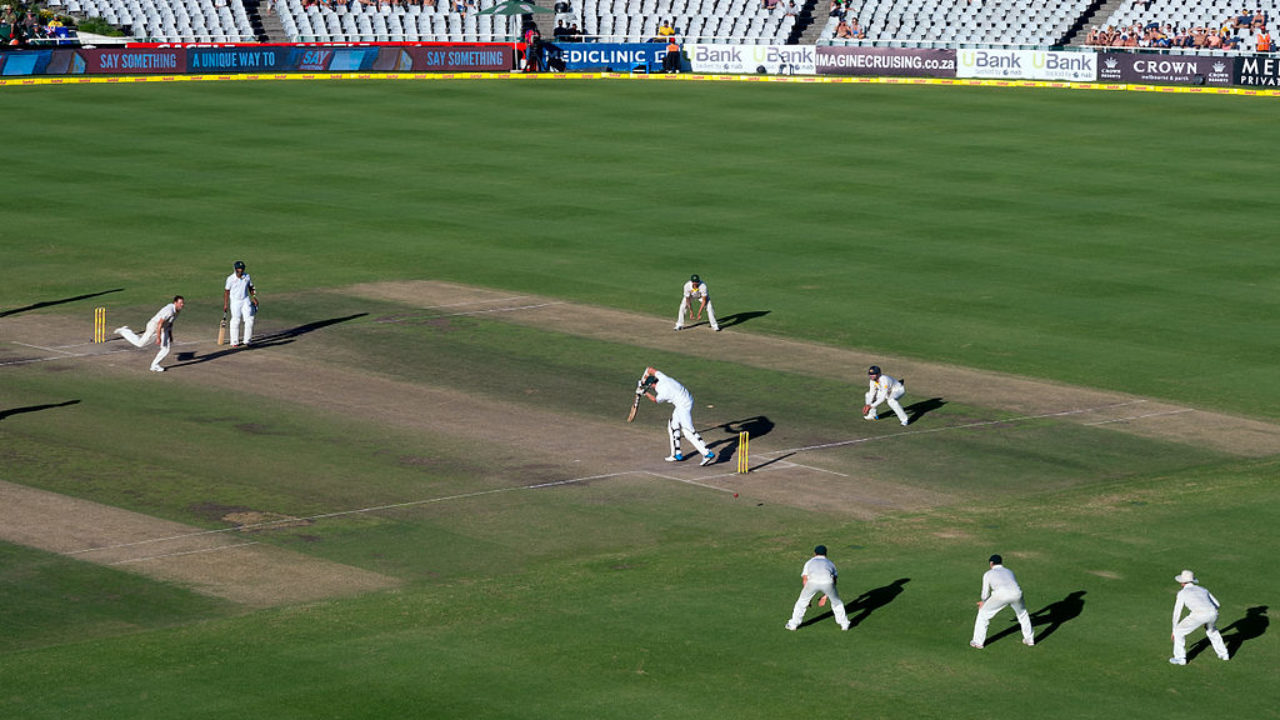

In [0]:
F = cv2.imread(path + 'rose.jpeg')
B = cv2.imread(path + 'stadium.jpg')
B.shape 
F.shape
xo = 0
yo = 0 
f=1
for i in range(F.shape[0]):
  f=1
  for j in range(F.shape[1]):
      if F[i,j,1] == 0 and f == 1:
        F[i,j:] = 255
      else:
        f=0
       
for i in range(F.shape[0]):
  for j in range(F.shape[1]):
    if F[i,j,1] != F[1,1,1] and F[i,j,0] != F[1,1,0] and F[i,j,2] != F[1,1,2]: 
      B[i+xo,j+yo,0] = F[i,j,0]
      B[i+xo,j+yo,1] = F[i,j,1]
      B[i+xo,j+yo,2] = F[i,j,2]
cv2_imshow(np.hstack([B]))

In [0]:
path2 = '/content/drive/My Drive/images/'

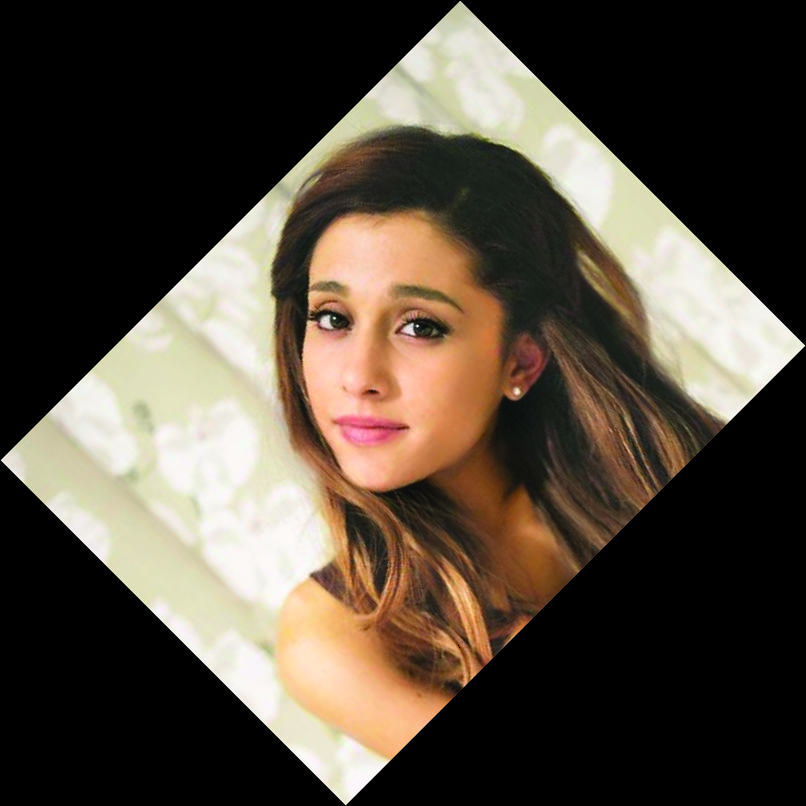

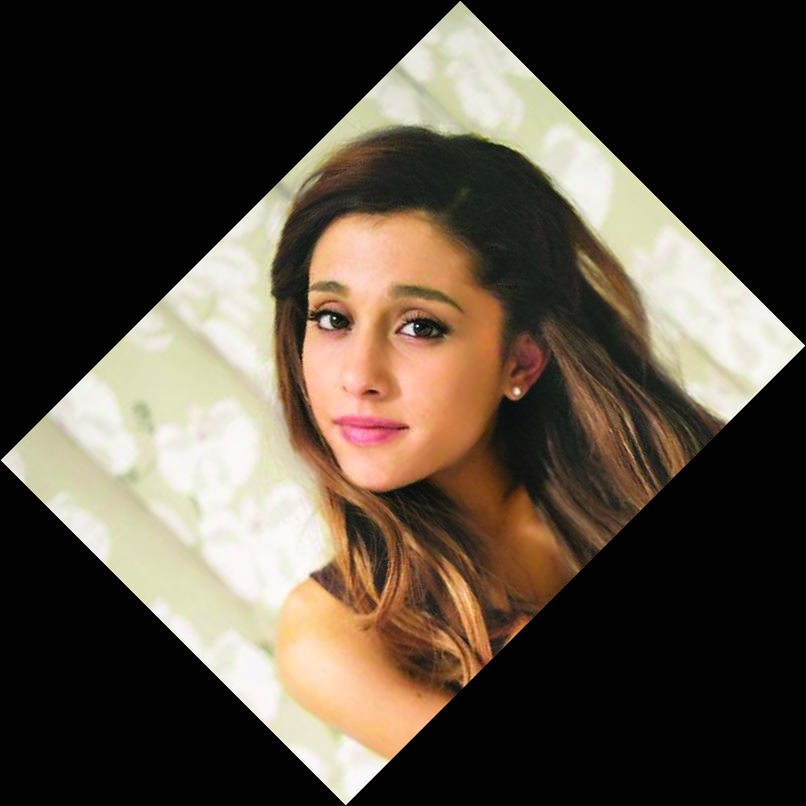

In [48]:
F = cv2.imread(path2 + 'aligned_face.jpg')
B = F.copy()
B[:,:,:] = 0
B.shape 
F.shape
xo = 0
yo = 0 
for i in range(F.shape[0]):
  for j in range(F.shape[1]):
    if F[i,j,1] != F[1,1,1] and F[i,j,0] != F[1,1,0] and F[i,j,2] != F[1,1,2]: 
      B[i+xo,j+yo,0] = F[i,j,0]
      B[i+xo,j+yo,1] = F[i,j,1]
      B[i+xo,j+yo,2] = F[i,j,2]
cv2_imshow(np.hstack([B]))
cv2_imshow(np.hstack([F]))
      

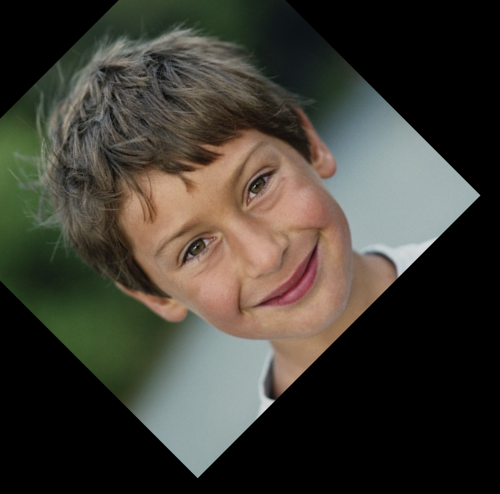

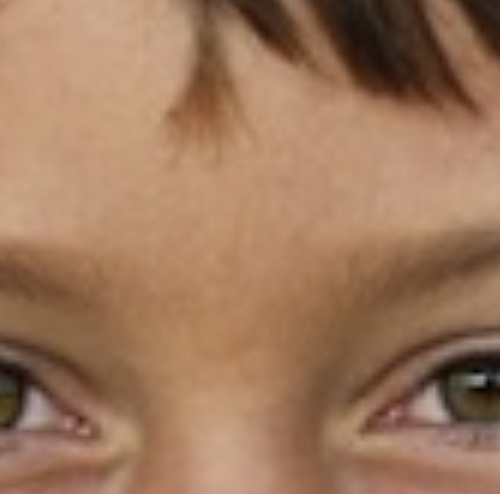

In [0]:
F = cv2.imread(path2 + 'boy_smiling.jpg')
h, w, c = F.shape
R = cv2.getRotationMatrix2D((w/2,h/2),45,1)
im_R = cv2.warpAffine(F,R,(w+100,h+100))
R2 = cv2.getRotationMatrix2D((w/2,h/2),0,6)
im_R2 = cv2.warpAffine(F,R2,(w+100,h+100))
cv2_imshow(im_R)
cv2_imshow(im_R2)

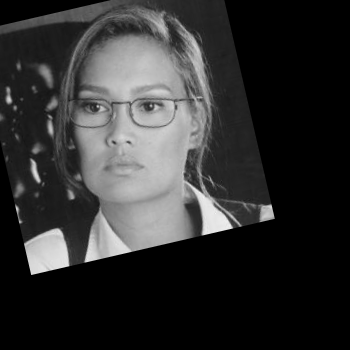

In [53]:
F = cv2.imread(path + 'face.jpg')
h, w, c = F.shape
# points = [[]]
# find angle with y=0
R = cv2.getRotationMatrix2D((w/2,h/2),13,1)
im_R = cv2.warpAffine(F,R,(w+100,h+100))
cv2_imshow(im_R)

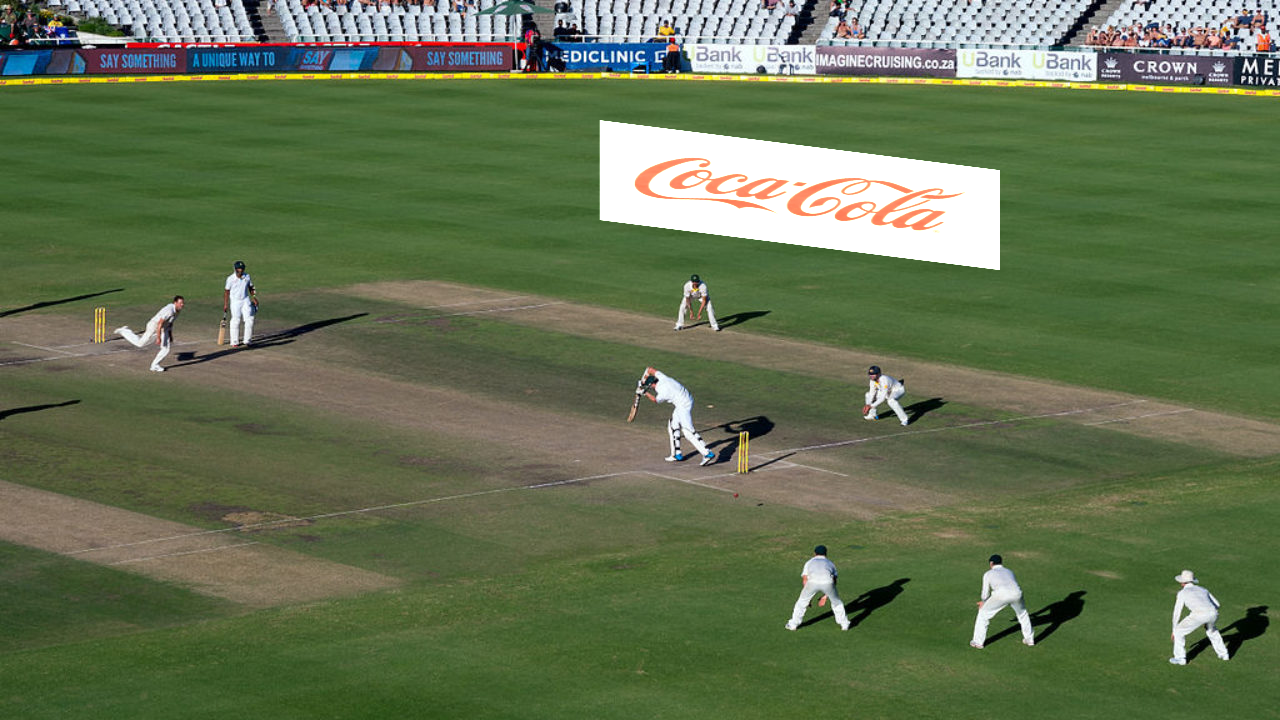

In [61]:
F = cv2.imread(path2 + 'coca.jpg')
B = cv2.imread(path2 + 'stadium.jpg')
h, w, c = F.shape
h1, w1, c1 = B.shape
pts1 = np.float32([[0,0],[0,179],[320, 0],[320,179]])
pts2 = np.float32([[600,120],[600, 220],[1000, 170],[1000, 270]]) 

R = cv2.findHomography (pts1,pts2)[0]
im_R = cv2.warpPerspective(F,R,(w1,h1))
cv2_imshow(cv2.add(B,im_R))

pts1 = np.float32([[0,0],[0,179],[320, 0],[320,179]]) # cola coords 
pts2 = np.float32([[600,120],[600, 220],[1000, 170],[1000, 270]]) # stadium tile coords